<img src = 'https://github.com/srinivasracherla/eatsleepcoderepeat/blob/master/TelecomCapstoneImages/INSAID_Full_Logo.png?raw=true' width="240" height="360" >

# Capstone Project on Data Analytics - 'Telecom Consulting' - Group_1010


<img src="https://github.com/srinivasracherla/eatsleepcoderepeat/blob/master/TelecomCapstoneImages/1010_5.png?raw=true" width=905 height=900 align="left">
<br/>

## Table of Contents

1. [Problem Statement](#section1)<br><br>
2. [Importing Packages](#section2)<br><br>
3. [Data Loading and Profiling](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
  - 3.2 [Pandas Profiling before Data Preprocessing](#section302)<br>
  - 3.3 [Initial Observations](#section302)<br>
<br>
4. [Data Normalization](#section4)<br>
  - 4.1 [Data Preprocessing](#section401)<br>
      - 4.1.1 [Handling NaN data in the 'state' column (Events Dataset)](#section40101)<br>
      - 4.1.2 [Handling NaN data in the 'device_id' column (Events Dataset)](#section40102)<br>
      - 4.1.3 [Merging the 3 Datasets](#section40103)<br>      
      - 4.1.4 [Handling NaN data in the 'latitude', 'longitude' columns (Events Dataset)](#section40104)<br>      
      - 4.1.5 [Replacing the non-english values for 'phone_brand' column (Merged Dataset)](#section40105)<br>
      - 4.1.6 [Correcting the wrong values in 'latitude', 'longitude' columns (Merged Dataset)](#section40106)<br>
      - 4.1.7 [Dataset export for the Web UI Manager](#section40107)<br>
      
  - 4.2 [Pandas Profiling after Data Preprocessing](#section402)<br>
  - 4.3 [Final Observations](#section402)<br><br>
5. [Exploratory Data Analysis](#section5)<br>
  - 5.1 [**Analysis based on the User distribution**](#section501)<br>
    - 5.1.1 [How are the Users distributed across Gender ?](#section50101)<br>
    - 5.1.2 [How are the Users distributed across Age Segments ?](#section50102)<br>
    - 5.1.3 [How are the Users distributed across State ?](#section50103)<br>
    - 5.1.4 [How are the Users distributed across top Phone Brands ?](#section50104)<br>
<br>
  - 5.2 [**Analysis based on the distribution of top Phone brands**](#section502)<br>
      - 5.2.1 [How are the top Phone Brands distributed across Gender ?](#section50201)<br>
      - 5.2.2 [How are the top Phone Brands distributed across States ?](#section50202)<br>
      - 5.2.3 [How are the top Phone Brands distributed across Age Segments ?](#section50203)<br><br>
      
  - 5.3 [**Analysis based on the distribution of the User Gender**](#section503)<br>
      - 5.3.1 [How is the user Gender distributed across States ?](#section50301)<br>
      - 5.3.2 [How is the user Gender distributed across Age Segments ?](#section50302)<br>
      - 5.3.3 [How is the user Gender distributed across top Phone Brands ?](#section50303)<br><br>

  - 5.4 [**Analysis based on the distribution of Age segments of the Users**](#section504)<br>
      - 5.4.1 [How are the Age Segments distributed across States ?](#section50401)<br>
      - 5.4.2 [How are the Age Segments distributed across user Gender ?](#section50402)<br>
      - 5.4.3 [How are the Age Segments distributed across top Phone Brands ?](#section50403)<br><br>

  - 5.5 [**Analysis based on the Hourly distribution of Phone calls**](#section505)<br>
      - 5.5.1 [x](#section50501)<br><br>
      
6. [Conclusion](#section6)
  - 6.2 [Actionable Insights](#section602)

<a id=section1></a>
## 1. Problem Statement

- Study the **demographics of mobile users** in India (several thousands) based on their mobile usage, geolocation, and mobile device properties.
- Build a dashboard showcasing the **user behavioural insights** in an interactive fashion.
- Which the INSAIDTelecom will consume, and **customise their offerings** that are **relevant** to their users and catered to their **preferences**.
<br/><br/>




<img src='https://github.com/srinivasracherla/eatsleepcoderepeat/blob/master/TelecomCapstoneImages/1010_4.jpg?raw=true' align='left' width=910 height=700>

<br/>

---

<a id=section2></a>
## 2. Importing Packages

In [1]:
import numpy as np                     
import pandas as pd
import pandas_profiling
pd.set_option('mode.chained_assignment', None)      # To suppress pandas warnings.
pd.set_option('display.max_colwidth', -1)           # To display all the data in each column
pd.options.display.max_columns = 50                 # To display every column of the dataset in head()

import warnings
warnings.filterwarnings('ignore')                   # To suppress all the warnings in the notebook.

In [2]:
#pip install mysql-connector-python
import mysql.connector                              # To connect to mysql engine
from mysql.connector import Error

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3, color_codes=True)      # To apply seaborn styles to the plots.

In [4]:
# Making plotly specific imports
# These imports are necessary to use plotly offline without signing in to their website.

from plotly.offline import init_notebook_mode, iplot
#import plotly.graph_objs as go
# import chart_studio.plotly as py
from plotly import tools
init_notebook_mode(connected=True)

import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots

---

### Disclaimer: The images are for illustration purpose only. Please don't compare them with the data.

<a id=section3></a>
## 3. Data Loading & Profiling

In this **Telecom Consulting** project we are using 3 datasets viz. 
- **Mobile usage data** in the form of **events** captured on INSAIDTelecom network. (<i>events_data.csv</i>)
- **Device user demographics data** that constitute **gender, age, age groups** of users. (<i>gender_age_train</i> table on MySQL DB)
- **Device brand and model data** that constitute the **make, models** of the devices. (<i>phone_brand_device_model</i> table on MySQL DB)
<br/>
Details of the MySQL DB: Host (cpanel.insaid.co); User (student); Password (student); DB (Capstone1)
<br/>
<br/>




<img src='https://github.com/srinivasracherla/eatsleepcoderepeat/blob/master/TelecomCapstoneImages/1010_2.jpg?raw=true' align='left' width=930 >

<br/><br/>


### Importing the Datasets

- #### Importing the 1st dataset - Mobile Events data (CSV - events_data)

In [5]:
dtype_dic= {'device_id':str}
Events_data_df = pd.read_csv('events_data.csv', dtype = dtype_dic)
Events_data_df.head()

event_id             device_id            timestamp  longitude   latitude  \
0  2765368   2973347786994914304   2016-05-07 22:52:05  77.225676  28.730140   
1  2955066   4734221357723754978   2016-05-01 20:44:16  88.388361  22.660325   
2  605968    -3264499652692492784  2016-05-02 14:23:04  77.256809  28.757906   
3  448114    5731369272434022440   2016-05-03 13:21:16  80.343613  13.153332   
4  665740    338888002570799963    2016-05-06 03:51:05  85.997745  23.842609   

       city       state  
0  Delhi     Delhi       
1  Calcutta  WestBengal  
2  Delhi     Delhi       
3  Chennai   TamilNadu   
4  Bokaro    Jharkhand

<a id=section301></a>

### Description of the Dataset

- This dataset provides the  **mobile events** (event_id) generated by the various users that consume the **INSAIDTelecom network** along with **their demographic data** such as device_id, timestamp, longitude, latitude, state, city.



| Column Name            | Description                                                                                |
| -----------------------|:------------------------------------------------------------------------------------------:| 
| event_id               | Unique ID of the event that gets generated when a user uses mobile on INSAID Telecom network.                                            | 
| device_id              | ID of the device used by the user.               | 
| timestamp              | The timestamp of each event that gets logged.   | 
| longitude              | The longitude of the location of user logging an event.                                    |
| latitude               | The latitude of the location of user logging an event.                                                            |
| city                   | The city of the user logging an event.          |
| state                  | The state of the user logging an event. |



<img src="https://github.com/srinivasracherla/eatsleepcoderepeat/blob/master/TelecomCapstoneImages/1010_3.jpg?raw=true" align="left" width=930 >

<br/>


In [6]:
Events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    object
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


In [7]:
Events_data_df.describe(include='all')

event_id            device_id            timestamp     longitude  \
count   3.252950e+06  3252497              3252950              3.252527e+06   
unique NaN            60865                588126              NaN             
top    NaN            5536513450525271144  2016-05-03 10:00:03 NaN             
freq   NaN            33426                43                  NaN             
mean    1.626476e+06  NaN                  NaN                  7.815868e+01   
std     9.390459e+05  NaN                  NaN                  4.235570e+00   
min     1.000000e+00  NaN                  NaN                  1.256700e+01   
25%     8.132382e+05  NaN                  NaN                  7.583543e+01   
50%     1.626476e+06  NaN                  NaN                  7.726814e+01   
75%     2.439713e+06  NaN                  NaN                  8.031916e+01   
max     3.252950e+06  NaN                  NaN                  9.545946e+01   

            latitude     city    state  
count   3.252527e+06  3252950  3252573  
unique NaN            933      32       
top    NaN            Delhi    Delhi    
freq   NaN            744276   751733   
mean    2.168851e+01  NaN      NaN      
std     5.789111e+00  NaN      NaN      
min     8.190110e+00  NaN      NaN      
25%     1.780171e+01  NaN      NaN      
50%     2.216454e+01  NaN      NaN      
75%     2.868278e+01  NaN      NaN      
max     4.187190e+01  NaN      NaN

---

- #### Importing the 2nd dataset - Customer demographic data (MySQL table - gender_age_train)

In [8]:
# Creating a connection to the MySQL DB and querying the data

connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')
sql_select_Query = "select * from information_schema.columns where table_name = 'gender_age_train'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in gender_age_train is: ", cursor.rowcount)
print("\nPrinting column Names of table gender_age_train ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from gender_age_train"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from gender_age_train to dataframe")

gender_age_train_df = pd.DataFrame(records)


Total number of rows in gender_age_train is:  4

Printing column Names of table gender_age_train 
Table_Name =  gender_age_train
Column Name  =  device_id 

Table_Name =  gender_age_train
Column Name  =  gender 

Table_Name =  gender_age_train
Column Name  =  age 

Table_Name =  gender_age_train
Column Name  =  group 

---------------------------------------------------------------------------------------------------------

 Storing records from gender_age_train to dataframe


In [9]:
Customer_data_df = gender_age_train_df.rename(columns={0:'device_id',1:'gender',2:'age',3:'group'})

In [10]:
Customer_data_df.head()

device_id gender  age   group
0 -8076087639492063270  M      35   M32-38
1 -2897161552818060146  M      35   M32-38
2 -8260683887967679142  M      35   M32-38
3 -4938849341048082022  M      30   M29-31
4  245133531816851882   M      30   M29-31

### Description of the Dataset

- This dataset provides the  **user demographic data** such as gender, age, age-group for the transacting **mobile devices** (device_id) customers.



| Column Name            | Description                                                                                |
| -----------------------|:------------------------------------------------------------------------------------------:| 
| device_id              | The unique ID of the device used by the user.               | 
| gender              | The gender of the customer who uses the particular device.                                    |
| age               | The age of the customer who uses the particular device.                                                            |
| group                  | The age group of the customer who uses the particular device. |


In [11]:
Customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [12]:
Customer_data_df.describe(include='all')

device_id gender           age   group
count   7.464500e+04  74645  74645.000000  74645 
unique NaN            2     NaN            12    
top    NaN            M     NaN            M23-26
freq   NaN            47904 NaN            9605  
mean   -7.491354e+14  NaN    31.410342     NaN   
std     5.327150e+18  NaN    9.868735      NaN   
min    -9.223067e+18  NaN    1.000000      NaN   
25%    -4.617367e+18  NaN    25.000000     NaN   
50%    -1.841362e+16  NaN    29.000000     NaN   
75%     4.636656e+18  NaN    36.000000     NaN   
max     9.222849e+18  NaN    96.000000     NaN

---

- #### Importing the 3rd dataset - Phone brands & models data (MySQL table - phone_brand_device_model)

In [13]:
# Creating a connection to the MySQL DB and querying the data

connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

sql_select_Query = "select * from information_schema.columns where table_name = 'phone_brand_device_model'"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("Total number of rows in phone_brand_device_model is: ", cursor.rowcount)
print("\nPrinting column Names of table phone_brand_device_model ")
for row in records:
    print("Table_Name = ", row[2], )
    print("Column Name  = ", row[3], "\n")
    
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from phone_brand_device_model"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from phone_brand_device_model to dataframe")

phone_brand_device_model_df = pd.DataFrame(records)


Total number of rows in phone_brand_device_model is:  3

Printing column Names of table phone_brand_device_model 
Table_Name =  phone_brand_device_model
Column Name  =  device_id 

Table_Name =  phone_brand_device_model
Column Name  =  phone_brand 

Table_Name =  phone_brand_device_model
Column Name  =  device_model 

---------------------------------------------------------------------------------------------------------

 Storing records from phone_brand_device_model to dataframe


In [14]:
Brand_data_df = phone_brand_device_model_df.rename(columns={0:'device_id',1:'phone_brand',2:'device_model'})

In [15]:
Brand_data_df.head()

device_id phone_brand device_model
0  1877775838486905855  vivo        Y13        
1 -3766087376657242966  小米          V183       
2 -6238937574958215831  OPPO        R7s        
3  8973197758510677470  三星          A368t      
4 -2015528097870762664  小米          红米Note2

### Description of the Dataset

- This dataset provides the  **phone brands** and **phone models** data (phone_brand, device_model) of the **devices** (device_id) used by the customers.



| Column Name            | Description                                                                                |
| -----------------------|:------------------------------------------------------------------------------------------:| 
| device_id              | The unique ID of the device used by the user.                | 
| phone_brand              | The phone brand of the device being used by the customer.                                    |
| device_model                  | The device model of the device being used by the customer. |


In [16]:
Brand_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null int64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [17]:
Brand_data_df.describe(include='all')

device_id phone_brand device_model
count   8.772600e+04  87726       87726      
unique NaN            116         1467       
top    NaN            小米          红米note     
freq   NaN            21645       3500       
mean   -5.212557e+15  NaN         NaN        
std     5.330157e+18  NaN         NaN        
min    -9.223322e+18  NaN         NaN        
25%    -4.623331e+18  NaN         NaN        
50%    -3.109802e+16  NaN         NaN        
75%     4.635194e+18  NaN         NaN        
max     9.222849e+18  NaN         NaN

---

<a id=section302></a>
### 3.2 Pandas Profiling before Data Preprocessing

In [18]:
import pandas_profiling

# Profiling of the Mobile Events dataset
profile1 = Events_data_df.profile_report(title="Events_Dataset Profiling before Data Preprocessing")
profile1.to_file(output_file="Events_Dataset_profiling_before_preprocessing.html")

# Profiling of the Customer demographics dataset
profile2 = Customer_data_df.profile_report(title="Customer_Dataset Profiling before Data Preprocessing")
profile2.to_file(output_file="Customer_Dataset_profiling_before_preprocessing.html")

# Profiling of the Brands info. dataset
profile3 = Brand_data_df.profile_report(title="Brands_Dataset Profiling before Data Preprocessing")
profile3.to_file(output_file="Brands_Dataset_profiling_before_preprocessing.html")

### Observations from Pandas Profiling before Data Processing 

<br>

__Mobile events Dataset__: 
- The dataset has 4 columns (device_id, gender, age, group), and 74645 records. 'device_id' is the unique key
- Count of Continuous variables is 2, and Count of Categorical variables is 2
- Count of null value columns is 0
- Variables 'gender' and 'group' are correlated
- The variable 'device_id' is of datatype int64
- There are 2 distinct genders 'M' and 'F'. Top gender is 'M' with a frequency of 47904, whereas 'F' constitutes 26741
- Mean and Mode for the 'age' variable are 31 and 26 respectively
- There are 12 distinct age groups. Top ‘group’ is 'M23-26' with a frequency of 9605

<br>

__Customer demographics Dataset__: 
- The dataset has 3 columns (device_id, phone_brand, device_model), and 87726 records. 'device_id' is the unique key.
- Count of Continuous variables is 1, and Count of Categorical variables is 2
- Count of null value columns is 0
- None of the variables have any correlation with the others
- The variable 'device_id' is of datatype int64
- There are 116 distinct phone brands. Top 'phone_brand' is Xiaomi with a fequency of 21645
- phone_brand' has values in **non-english language**
- There are 1467 distinct device models. Top 'device_model' is Redmi1note with a frequency of 3500
- device_model' has values part of which are in **non-english language**

<br>


__Device brands Dataset__: 
- The dataset has 7 columns (event_id, device_id, timestamp, longitude, latitude, city, state), and 3252950 records. 'event_id' is the unique key.
- Count of Continuous variables is 4, and Count of Categorical variables is 3
- Count of **null value columns** is 4
- Variables 'longitude' and 'latitude' are slightly correlated
- The variables 'device_id', 'longitude', 'latitude' are of datatype float64
- 33426 is the count of events logged by the top 'device_id'
- device_id' has **453 null values**
- timestamp' has a high cardinality of 588126
- The event data corresponds to a period of 9days in the year 2016 viz. 30April to 8May
- 483293 is the count of events logged on top timestamp-day viz. 3May’2016
- longitude' and 'latitude' have **423 null values** each
- Top 'city' is 'Delhi' with a frequency of 744276
- state' has **377 null values**
- Top 'state' is 'Delhi' with a frequency of 751733
- Some of the **, and latitudes correspond to wrong locations** when compared with the data description

<br>






<a id=section4></a>
## 4. Data Normalization

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.

<a id=section40101></a>
### 4.1.1 Handling NaN data in the 'state' column (Events dataset)

- There are 32lac records out of which the column 'state' has 450 NaN values
- Here we pick the data from 'city' column value with non-NaN 'state' value, and fill the 'state' NaN values with corresponding 'city' column value
- We use mode for the 'city'
- The same applies to other columns with NaN values

- Function to impute the column with mode based on particular criteria:

In [18]:

def impute_values(final_df, colrefername,col1,col2):
    df_all=final_df
    boolseries = pd.isnull(df_all[col1])  
    df_na=df_all[boolseries]

    boolseries = pd.notnull(df_all[col1])  
    df_proper=df_all[boolseries]

    frames=[]
    for colrefer in list(set(df_na[colrefername])):
          
        dffilt_all = df_all[df_all[colrefername]== colrefer]
        dffilt_na = df_na[df_na[colrefername]== colrefer]
        fillval1 = dffilt_all[col1].mode()[0]
        dffilt_na[col1].fillna(fillval1,inplace = True)
        fillval2=''
        if col2!='':
            fillval2 = dffilt_all[col2].mode()[0]
            dffilt_na[col2].fillna(fillval2,inplace = True)
        print('columnused:'+colrefername+'>'+str(colrefer)+'>'+'for filling:'+str(col1)+str(col2)+'filled with:'+str(fillval1)+str(fillval2) )
        
        frames.append(dffilt_na)
        df_final = pd.concat(frames)
        
    frames=[]
    frames.append(df_final)
    frames.append(df_proper)
    final_dfimputed = pd.concat(frames)
    return final_dfimputed


- Imputing the state column

In [19]:
final_df = Events_data_df
chkdf = final_df

df_final = pd.DataFrame()
coltoimpute1='state'
colcriteria='city'
df_final = impute_values(final_df, colcriteria,coltoimpute1,'')

columnused:city>Arambagh>for filling:statefilled with:WestBengal
columnused:city>Visakhapatnam>for filling:statefilled with:AndhraPradesh
columnused:city>Indore>for filling:statefilled with:MadhyaPradesh
columnused:city>Gangarampur>for filling:statefilled with:WestBengal
columnused:city>Channapatna>for filling:statefilled with:Karnataka
columnused:city>Jaipur>for filling:statefilled with:Rajasthan
columnused:city>Delhi>for filling:statefilled with:Delhi
columnused:city>Chennai>for filling:statefilled with:TamilNadu
columnused:city>Pune>for filling:statefilled with:Maharashtra


In [20]:
boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
#cross check if Nan is filled
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')
mrgcheck[['device_id_x','city_x','state_x', 'city_y','state_y']].head(100)

device_id_x         city_x state_x         city_y        state_y
0   -5829328361235250344  Pune           NaN     Pune           Maharashtra  
1   3137053756433768671   Visakhapatnam  NaN     Visakhapatnam  AndhraPradesh
2   -1752057305775059707  Indore         NaN     Indore         MadhyaPradesh
3   -394582654031064105   Visakhapatnam  NaN     Visakhapatnam  AndhraPradesh
4   5536513450525271144   Chennai        NaN     Chennai        TamilNadu    
..                  ...       ...        ...         ...              ...    
95  1177845145394796843   Jaipur         NaN     Jaipur         Rajasthan    
96  -394582654031064105   Visakhapatnam  NaN     Visakhapatnam  AndhraPradesh
97  4620270824872937618   Arambagh       NaN     Arambagh       WestBengal   
98  1177845145394796843   Jaipur         NaN     Jaipur         Rajasthan    
99  -5829328361235250344  Pune           NaN     Pune           Maharashtra  

[100 rows x 5 columns]

- Checking to see whether the NaN values in 'state' are handled thru imputation

In [21]:
df_final.isnull().sum()

event_id     0  
device_id    453
timestamp    0  
longitude    423
latitude     423
city         0  
state        0  
dtype: int64

---

<a id=section40102></a>
### 4.1.2 Handling NaN data in the 'device_id' column (Events dataset)

- Reading the NaN values in 'device_id' column
- Casting the 'device_id' as string variable

In [22]:
# creating bool series True for NaN values  
bool_series = pd.isnull(Events_data_df["device_id"])  
    
# filtering data  
Events_data_df[bool_series]  

event_id device_id            timestamp  longitude   latitude  \
2055     1936567   NaN       2016-05-02 15:27:54  75.882956  22.814519   
26367    2659282   NaN       2016-05-04 14:06:24  75.888487  26.948689   
42088    442198    NaN       2016-05-06 09:27:37  75.846007  26.960796   
43061    1903648   NaN       2016-05-02 15:41:54  75.923332  22.777781   
44823    3227383   NaN       2016-05-05 08:37:09  75.992551  31.561747   
...          ...   ...                       ...        ...        ...   
3212337  2191286   NaN       2016-05-04 18:16:06  83.357991  17.805195   
3215120  572054    NaN       2016-05-07 08:48:22  83.371738  17.752819   
3230115  332451    NaN       2016-05-07 09:01:45  75.992551  31.561747   
3235494  2534073   NaN       2016-05-06 21:07:01  83.371738  17.752819   
3250939  1622538   NaN       2016-05-06 21:26:10  75.888487  26.948689   

                  city          state  
2055     Indore         MadhyaPradesh  
26367    Jaipur         Rajasthan      
42088    Jaipur         Rajasthan      
43061    Indore         MadhyaPradesh  
44823    Hoshiarpur     Punjab         
...             ...        ...         
3212337  Visakhapatnam  AndhraPradesh  
3215120  Visakhapatnam  AndhraPradesh  
3230115  Hoshiarpur     Punjab         
3235494  Visakhapatnam  AndhraPradesh  
3250939  Jaipur         Rajasthan      

[453 rows x 7 columns]

In [23]:
Customer_data_df['device_id'] = Customer_data_df['device_id'].astype(str)
Brand_data_df['device_id'] = Brand_data_df['device_id'].astype(str)

- Imputing the 'device_id' column

In [24]:
#impute device_id
final_df = df_final
chkdf=final_df
final_df["latlong"] = final_df["longitude"].astype(str) + final_df["latitude"].astype(str)
coltoimpute1='device_id'
coltoimpute2=''
colcriteria='latlong'


df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()
df_final.isnull().sum()


boolseries = pd.isnull(chkdf[coltoimpute1])  
df_narecordstocheck=final_df[boolseries]
mrgcheck = pd.merge(left=df_narecordstocheck, right=df_final, how="inner", left_on='event_id', right_on='event_id')

mrgcheck[['event_id','device_id_x','device_id_y']].head(1000)

columnused:latlong>80.3354349999999813.189053>for filling:device_idfilled with:7983871429718484702
columnused:latlong>77.2924810000000228.719966000000003>for filling:device_idfilled with:5098778421671837341
columnused:latlong>75.9233319999999922.777781>for filling:device_idfilled with:7597735768595924821
columnused:latlong>77.3031530000000228.728888>for filling:device_idfilled with:-6875585507485886098
columnused:latlong>75.8829560000000222.814519>for filling:device_idfilled with:3132861355949762783
columnused:latlong>75.84600726.960796>for filling:device_idfilled with:-8460337302442785825
columnused:latlong>83.34271117.822906>for filling:device_idfilled with:6619714762103551896
columnused:latlong>75.83616726.95399>for filling:device_idfilled with:3562355872640618177
columnused:latlong>73.86275618.628057>for filling:device_idfilled with:9027085705222633039
columnused:latlong>73.1693449999999821.194283>for filling:device_idfilled with:-8215770519233685145
columnused:latlong>75.992550999

event_id device_id_x           device_id_y
0    1936567   NaN         3132861355949762783 
1    2659282   NaN         -917725110041294385 
2    442198    NaN         -8460337302442785825
3    1903648   NaN         7597735768595924821 
4    3227383   NaN         1750778632182066836 
..       ...   ...                         ... 
448  2191286   NaN         6844192269280790123 
449  572054    NaN         -3130903177076173323
450  332451    NaN         1750778632182066836 
451  2534073   NaN         -3130903177076173323
452  1622538   NaN         -917725110041294385 

[453 rows x 3 columns]

In [25]:
Customer_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null object
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [26]:
Brand_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null object
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: object(3)
memory usage: 2.0+ MB


---

<a id=section40103></a>
### 4.1.3 Merging the 3 datasets

In [27]:
df2=df_final;
merged1 = pd.merge(left=df2, right=Customer_data_df, how="left", left_on='device_id', right_on='device_id')
merged1 = pd.merge(left=merged1, right=Brand_data_df, how="left", left_on='device_id', right_on='device_id')

merged1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 0 to 3252949
Data columns (total 13 columns):
event_id        int64
device_id       object
timestamp       object
longitude       float64
latitude        float64
city            object
state           object
latlong         object
gender          object
age             int64
group           object
phone_brand     object
device_model    object
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


- Checking to see whether the NaN values in 'device_id' are handled thru imputation

In [28]:
merged1.isnull().sum()

event_id        0  
device_id       0  
timestamp       0  
longitude       423
latitude        423
city            0  
state           0  
latlong         0  
gender          0  
age             0  
group           0  
phone_brand     0  
device_model    0  
dtype: int64

---

<a id=section40104></a>
### 4.1.4 Handling NaN data in the 'latitude', 'longitude' columns (Events Dataset)

- Imputing 'latitude', 'longitude' columns

In [29]:
final_df=merged1
coltoimpute1='longitude'
coltoimpute2='latitude'
colcriteria='device_id'
df_final = impute_values(final_df, colcriteria,coltoimpute1,coltoimpute2)
final_df.info()


columnused:device_id>5731369272434022440>for filling:longitudelatitudefilled with:80.3436129999999813.153332
columnused:device_id>305848775386534942>for filling:longitudelatitudefilled with:75.86553426.987565999999998
columnused:device_id>7018600380123444976>for filling:longitudelatitudefilled with:73.9262230000000218.575747
columnused:device_id>4580179444377397556>for filling:longitudelatitudefilled with:75.83575626.960220000000003
columnused:device_id>1779631023439405334>for filling:longitudelatitudefilled with:77.23541628.738901
columnused:device_id>5518659601894557482>for filling:longitudelatitudefilled with:83.38424217.817945
columnused:device_id>5115185276392512955>for filling:longitudelatitudefilled with:73.8886800000000218.556741
columnused:device_id>7662139143719919126>for filling:longitudelatitudefilled with:80.3092719999999813.149176
columnused:device_id>3099168546198768813>for filling:longitudelatitudefilled with:84.140927.17739700000001
columnused:device_id>798387142971848

- Checking to see whether the NaN values in 'longitude', 'latitude' columns are handled thru imputation

In [30]:
df_final.isnull().sum()

event_id        0
device_id       0
timestamp       0
longitude       0
latitude        0
city            0
state           0
latlong         0
gender          0
age             0
group           0
phone_brand     0
device_model    0
dtype: int64

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3252950 entries, 126652 to 3252949
Data columns (total 13 columns):
event_id        int64
device_id       object
timestamp       object
longitude       float64
latitude        float64
city            object
state           object
latlong         object
gender          object
age             int64
group           object
phone_brand     object
device_model    object
dtypes: float64(2), int64(2), object(9)
memory usage: 347.5+ MB


- States to focus for the Consulting are:
**TamilNadu, Manipur, Chandigarh, Tripura, UttarPradesh, ArunachalPradesh**
- Thereby filtering the dataset by the 6 states:


In [32]:
df_states = df_final.query("state == 'TamilNadu' | state == 'Manipur' | state == 'Tripura' | state == 'Chandigarh' | state == 'UttarPradesh' | state == 'ArunachalPradesh'")
df_states.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 126652 to 3252949
Data columns (total 13 columns):
event_id        534462 non-null int64
device_id       534462 non-null object
timestamp       534462 non-null object
longitude       534462 non-null float64
latitude        534462 non-null float64
city            534462 non-null object
state           534462 non-null object
latlong         534462 non-null object
gender          534462 non-null object
age             534462 non-null int64
group           534462 non-null object
phone_brand     534462 non-null object
device_model    534462 non-null object
dtypes: float64(2), int64(2), object(9)
memory usage: 57.1+ MB


---

<a id=section40105></a>
### 4.1.5 Replacing the non-english values for 'phone_brand' column (Merged Dataset)

- Using the translation codes to replace non-english values under 'phone_brand' column

In [33]:
df_states['brand'] = df_states['phone_brand']
df_states['brand'].replace('小米','Xiaomi',inplace=True)
df_states['brand'].replace('华为','Huawei',inplace=True)
df_states['brand'].replace('三星','Samsung',inplace=True)
df_states['brand'].replace('魅族','Meizu',inplace=True)
df_states['brand'].replace('酷派','Coolpad',inplace=True)
df_states['brand'].replace('乐视','LeEco',inplace=True)
df_states['brand'].replace('联想','Lenovo',inplace=True)
df_states['brand'].replace('联想 ','Lenovo',inplace=True)

In [34]:
df_states.head()

event_id            device_id            timestamp  longitude  \
126652   918193    5731369272434022440  2016-05-04 04:35:06  80.343613   
269377   3173472   5731369272434022440  2016-05-07 16:45:56  80.343613   
742037   1817900   5731369272434022440  2016-05-02 04:49:52  80.343613   
919879   2278585   5731369272434022440  2016-05-07 01:42:57  80.343613   
1001324  1822609   5731369272434022440  2016-05-04 09:38:01  80.343613   

          latitude     city      state latlong gender  age   group  \
126652   13.153332  Chennai  TamilNadu  nannan  M      26   M23-26   
269377   13.153332  Chennai  TamilNadu  nannan  M      26   M23-26   
742037   13.153332  Chennai  TamilNadu  nannan  M      26   M23-26   
919879   13.153332  Chennai  TamilNadu  nannan  M      26   M23-26   
1001324  13.153332  Chennai  TamilNadu  nannan  M      26   M23-26   

        phone_brand device_model brand  
126652   HTC         One max      HTC   
269377   HTC         One max      HTC   
742037   HTC         One max      HTC   
919879   HTC         One max      HTC   
1001324  HTC         One max      HTC

- Dropping the extra columns created while working on column imputation

In [35]:
df_states.drop(columns=['phone_brand', 'latlong'], inplace=True)

In [36]:
df_states

event_id             device_id            timestamp  longitude  \
126652   918193    5731369272434022440   2016-05-04 04:35:06  80.343613   
269377   3173472   5731369272434022440   2016-05-07 16:45:56  80.343613   
742037   1817900   5731369272434022440   2016-05-02 04:49:52  80.343613   
919879   2278585   5731369272434022440   2016-05-07 01:42:57  80.343613   
1001324  1822609   5731369272434022440   2016-05-04 09:38:01  80.343613   
...          ...                   ...                   ...        ...   
3252919  2908565   -887854960539688221   2016-05-04 12:24:39  80.344270   
3252931  2406687   -4516402734523121366  2016-05-01 03:15:20  80.345227   
3252932  1906121   5536513450525271144   2016-05-06 16:32:43  80.359796   
3252934  1103441   -5312677556652692919  2016-05-03 22:07:23  79.569352   
3252949  522592    3212750469059608826   2016-05-07 17:34:18  77.308533   

          latitude     city         state gender  age   group device_model  \
126652   13.153332  Chennai  TamilNadu     M      26   M23-26  One max       
269377   13.153332  Chennai  TamilNadu     M      26   M23-26  One max       
742037   13.153332  Chennai  TamilNadu     M      26   M23-26  One max       
919879   13.153332  Chennai  TamilNadu     M      26   M23-26  One max       
1001324  13.153332  Chennai  TamilNadu     M      26   M23-26  One max       
...            ...      ...        ...    ..      ..      ...      ...       
3252919  13.167237  Chennai  TamilNadu     M      33   M32-38  MI 3          
3252931  13.180708  Chennai  TamilNadu     F      24   F24-26  X5M           
3252932  13.128174  Chennai  TamilNadu     M      32   M32-38  红米2           
3252934  28.811260  Baheri   UttarPradesh  F      35   F33-42  红米note        
3252949  9.779918   Kambam   TamilNadu     F      31   F29-32  MI 4          

          brand  
126652   HTC     
269377   HTC     
742037   HTC     
919879   HTC     
1001324  HTC     
...      ...     
3252919  Xiaomi  
3252931  vivo    
3252932  Xiaomi  
3252934  Xiaomi  
3252949  Xiaomi  

[534462 rows x 12 columns]

- Writing the working dataset to CSV file

In [37]:
df_states.to_csv('cap_df_states.csv', encoding='utf-8')

---

<a id=section40106></a>
### 4.1.6 Correcting the wrong values in 'latitude', 'longitude' columns (Merged Dataset)

- Plotting the dataset to see discrepancies in 'latitude', 'longitude' columns

In [38]:
raw_df1 = pd.read_csv('cap_df_states.csv')
raw_df = raw_df1

print(raw_df.shape)

df = raw_df.drop_duplicates(subset=['latitude','longitude','city'], keep='first', inplace=False)

df['text'] =  df['city'] + ', ' + df['state'] +','+df['device_id'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = 'blueviolet',
        ))

fig.update_layout(
        title = 'Hover to find state',
        geo_scope='asia',
    )
fig.show()

(534462, 13)


In [39]:
raw_df1["longlat"] = raw_df1["longitude"].astype(str) + raw_df1["latitude"].astype(str)

raw_df1["longitude1"] = raw_df1["longitude"].astype(str)
#we have to update state as Gujarat or drop these columns for longitude 72. as the city name is also wrong as Kadi comes under Gujarat

dfxx=raw_df1[raw_df1['longitude1'].str.match('72.')]
dfxx

Unnamed: 0  event_id            device_id            timestamp  \
281     1407        1198755  -353874933250887446   2016-05-01 10:27:12   
401     2261        1044870   652784178691057126   2016-05-02 18:52:18   
594     3451        1831495   535343017595963198   2016-05-03 16:21:39   
1439    8330        319056   -353874933250887446   2016-05-04 20:47:10   
1832    10848       726659    535343017595963198   2016-05-07 21:54:23   
...       ...          ...                   ...                   ...   
531874  3237434     996630    4578386262158994835  2016-05-03 20:35:23   
532081  3238702     2559718   8551222022046229244  2016-05-02 17:06:17   
532773  3242764     779492   -353874933250887446   2016-05-05 22:28:22   
533649  3247999     1459838  -8422431874197245747  2016-05-04 19:41:52   
534411  3252600     2616633   535343017595963198   2016-05-05 14:16:33   

        longitude   latitude  city         state gender  age   group  \
281     72.367590  23.389080  Kadi  UttarPradesh  F      36   F33-42   
401     72.394669  23.327080  Kadi  UttarPradesh  M      43   M39+     
594     72.365270  23.375839  Kadi  UttarPradesh  M      52   M39+     
1439    72.367590  23.389080  Kadi  UttarPradesh  F      36   F33-42   
1832    72.365270  23.375839  Kadi  UttarPradesh  M      52   M39+     
...           ...        ...   ...           ... ..      ..    ...     
531874  72.389010  23.368421  Kadi  UttarPradesh  M      17   M22-     
532081  72.382581  23.377576  Kadi  UttarPradesh  M      56   M39+     
532773  72.367590  23.389080  Kadi  UttarPradesh  F      36   F33-42   
533649  72.425512  23.330159  Kadi  UttarPradesh  M      26   M23-26   
534411  72.365270  23.375839  Kadi  UttarPradesh  M      52   M39+     

       device_model   brand                     longlat         longitude1  
281     EG970        海信      72.3675899999999823.38908   72.36758999999998  
401     Z5S          努比亚     72.39466923.32708           72.394669          
594     R1           OPPO    72.3652723.37583900000001   72.36527           
1439    EG970        海信      72.3675899999999823.38908   72.36758999999998  
1832    R1           OPPO    72.3652723.37583900000001   72.36527           
...     ..            ...                          ...        ...           
531874  红米note增强版    Xiaomi  72.3890123.368420999999998  72.38901           
532081  荣耀3X畅玩版      Huawei  72.38258123.377576          72.382581          
532773  EG970        海信      72.3675899999999823.38908   72.36758999999998  
533649  Xperia Z1    vivo    72.42551223.330159          72.425512          
534411  R1           OPPO    72.3652723.37583900000001   72.36527           

[947 rows x 15 columns]

- It can be clearly seen that the data when plotted has 947 wrong 'latitide', 'longitude' values (locations)
- One particular latitude longitude belonging to city 'Kadi' is falsely reported as Uttar Pradesh. So excluding that data from the analysis.

In [40]:
raw_df1.drop(raw_df1.index[raw_df1['city'] =='Kadi'], inplace = True)

In [41]:
raw_df1.loc[raw_df1['longlat'] =='69.207534.5553', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='69.207534.5553', "latitude"] = "80.359796"

raw_df1.loc[raw_df1['longlat'] =='55.270825.2048', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='55.270825.2048', "latitude"] = "80.359796"

raw_df1.loc[raw_df1['longlat'] =='12.567441.8719', "longitude"] = "13.128174"
raw_df1.loc[raw_df1['longlat'] =='12.567441.8719', "latitude"] = "80.359796"


In [42]:
dfq = raw_df1.query("longitude=='69.2075' and latitude=='34.5553'")
print(dfq)
dfq = raw_df1.query("longitude=='55.2708' and latitude=='25.2048'")
print(dfq)
dfq = raw_df1.query("longitude=='12.5674' and latitude=='41.8719'")
print(dfq)
raw_df1.head()

raw_df1.to_csv('cap_df_final.csv', encoding='utf-8')

Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, gender, age, group, device_model, brand, longlat, longitude1]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, gender, age, group, device_model, brand, longlat, longitude1]
Index: []
Empty DataFrame
Columns: [Unnamed: 0, event_id, device_id, timestamp, longitude, latitude, city, state, gender, age, group, device_model, brand, longlat, longitude1]
Index: []


In [43]:
raw_df1 = pd.read_csv('cap_df_final.csv')

raw_df = raw_df1
print(raw_df.shape)

df = raw_df.drop_duplicates(subset=['latitude','longitude','city'], keep='first', inplace=False)


df['text'] =  df['city'] + ', ' + df['state'] +','+df['device_id'].astype(str)
fig = go.Figure(data=go.Scattergeo(
        lon = df['longitude'],
        lat = df['latitude'],
        text = df['text'],
        mode = 'markers',
        marker_color = 'blueviolet',
        ))

fig.update_layout(
        title = 'Hover to find state',
        geo_scope='asia',
    )
fig.show()

(533515, 16)


- Writing the normalised dataset to CSV

In [44]:
dffinal =raw_df1
dffinal.to_csv('cap_df_final.csv', encoding='utf-8')


---

<a id=section40107></a>
### 4.1.7 Dataset export for the Web UI Manager

In [45]:
raw_df2 = pd.read_csv('cap_df_final.csv')
raw_df2.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  event_id            device_id  \
0  0           0             126652          918193    5731369272434022440   
1  1           1             269377          3173472   5731369272434022440   
2  2           2             742037          1817900   5731369272434022440   
3  3           3             919879          2278585   5731369272434022440   
4  4           4             1001324         1822609   5731369272434022440   

             timestamp  longitude   latitude     city      state gender  age  \
0  2016-05-04 04:35:06  80.343613  13.153332  Chennai  TamilNadu  M      26    
1  2016-05-07 16:45:56  80.343613  13.153332  Chennai  TamilNadu  M      26    
2  2016-05-02 04:49:52  80.343613  13.153332  Chennai  TamilNadu  M      26    
3  2016-05-07 01:42:57  80.343613  13.153332  Chennai  TamilNadu  M      26    
4  2016-05-04 09:38:01  80.343613  13.153332  Chennai  TamilNadu  M      26    

    group device_model brand                     longlat  longitude1  
0  M23-26  One max      HTC   80.3436129999999813.153332  80.343613   
1  M23-26  One max      HTC   80.3436129999999813.153332  80.343613   
2  M23-26  One max      HTC   80.3436129999999813.153332  80.343613   
3  M23-26  One max      HTC   80.3436129999999813.153332  80.343613   
4  M23-26  One max      HTC   80.3436129999999813.153332  80.343613

- Writing the dataset to a CSV in the format required for building an interactive dashboard
- "df-for-upload.csv" is the file to be used in building the dashboard

In [46]:
dffinal = dffinal.drop(columns=['city','gender','age','group','device_model','brand'])
dffinal = dffinal.drop(columns=['longlat'])
dffinal = dffinal.drop(columns=['Unnamed: 0','Unnamed: 0.1','longitude1'])

dffinal.set_index('event_id')
dffinal = dffinal.reset_index(drop=True)
dffinal.head()

dffinal.to_csv('df-for-upload.csv', encoding='utf-8')


raw_df2 = pd.read_csv('df-for-upload.csv')

raw_df2.head()

Unnamed: 0  event_id            device_id            timestamp  longitude  \
0  0           918193    5731369272434022440  2016-05-04 04:35:06  80.343613   
1  1           3173472   5731369272434022440  2016-05-07 16:45:56  80.343613   
2  2           1817900   5731369272434022440  2016-05-02 04:49:52  80.343613   
3  3           2278585   5731369272434022440  2016-05-07 01:42:57  80.343613   
4  4           1822609   5731369272434022440  2016-05-04 09:38:01  80.343613   

    latitude      state  
0  13.153332  TamilNadu  
1  13.153332  TamilNadu  
2  13.153332  TamilNadu  
3  13.153332  TamilNadu  
4  13.153332  TamilNadu

---

<a id=section402></a>
### 4.2 Pandas Profiling after Data Preprocessing

In [47]:
import pandas_profiling

# Profiling of the Merged final dataset
profile4 = raw_df1.profile_report(title="Merged_Dataset Profiling after Data Preprocessing")
profile4.to_file(output_file="Merged_Dataset_profiling_after_preprocessing.html")

### Observations from Pandas Profiling after Data Processing 

<br>

__Dataset info__:
- Number of variables: 12
- Number of observations: 533515
- Missing cells: 0 (0.0%)
- Duplicate rows: 0 (0.0%)


__Variables types__: 
- Numeric = 5
- Categorical = 7
<br>  




- None of the columns has any **NaN** values  
- The discrepancies in **'latitude', 'longitude'** columns are rectified


---

<a id=section5></a>
## 5. Exploratory Data Analysis

<a id=section501></a>
## 5.1 Analysis based on the User distribution

<a id=section50101></a>
### 5.1.1 How are the Users distributed across Gender ?

<a id=section50102></a>
### 5.1.2 How are the Users distributed across Age Segments ?

<a id=section50103></a>
### 5.1.3 How are the Users distributed across States ?

<a id=section50104></a>
### 5.1.4 How are the Users distributed across Top Phone Brands ?

In [48]:
raw_df = pd.read_csv('cap_df_final.csv')

print(raw_df.shape)
df2 = raw_df.drop_duplicates(subset=['device_id'], keep='first', inplace=False)

#bins = [5,16,25,30,35, 45, 50,60,90]

print(df2.shape)


(533515, 17)
(9538, 17)


age_bins
(5, 20]     754 
(20, 25]    2199
(25, 30]    2644
(30, 40]    2456
(40, 45]    585 
(45, 60]    715 
(60, 90]    185 
Name: age_bins, dtype: int64


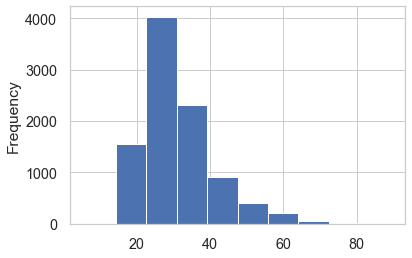

In [54]:
dfuniqdata=df2
bins = [5,20,25,30,40, 45,60,90]
dfuniqdata['age_bins'] = pd.cut(dfuniqdata['age'], bins)
dfuniqdata['age'].plot(kind='hist')
#dfuniqdata.info()
#df1.info()
df3 = dfuniqdata.groupby(['age_bins'])['age_bins'].count()
print (df3)

In [55]:
g = dfuniqdata.groupby(["age_bins"])
g.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  event_id            device_id  \
0    0           0             126652          918193    5731369272434022440   
21   21          21            97304           3186309   7662139143719919126   
42   42          42            16866           926804    7983871429718484702   
126  126         126           720             460124    5536513450525271144   
127  127         127           721             2921356  -4792366453774469421   
131  131         131           725             1004771   8331888722038251159   
175  175         175           840             3219828  -3433061233631405742   
177  177         177           845             998037    7594215820567965078   
178  178         178           846             2906758  -2168523477348251699   
179  179         179           849             2072637   3644267756307556227   
181  181         181           859             2930411   8420487327228896575   
182  182         182           865             1597771   1593692926654901459   
183  183         183           867             116230    2477565806954157636   
184  184         184           870             1010712  -588265504745227185    
185  185         185           879             2681910  -3693192455369015719   
187  187         187           894             2159094   3548666807647127472   
188  188         188           896             522867   -4676058099067945690   
189  189         189           898             3166154   6422748937918149083   
190  190         190           917             2927466   7504679594395103702   
191  191         191           918             3173738   9114825954360889056   
192  192         192           919             2299630   760747426901347146    
194  194         194           933             2715764  -9000824942071168388   
196  196         196           953             2042758  -5082931622367118586   
199  199         199           971             2827787   670495495923745254    
201  201         201           993             2905719  -5386357308574232459   
209  209         209           1033            356391   -778091204089444489    
211  211         211           1038            30331    -4432735844447335485   
217  217         217           1085            1646585   8258052497226749498   
222  222         222           1111            1922415  -2606925366601482669   
228  228         228           1135            2367484   8006739344249583991   
233  233         233           1169            3051425   1998827839104670585   
256  256         256           1267            3080210   8172548858403141884   
281  281         282           1429            1933477   5426528618668523174   
293  293         294           1541            1050924   6821597660718586221   
297  297         298           1567            2274850   4551089653791781960   

               timestamp  longitude   latitude                city  \
0    2016-05-04 04:35:06  80.343613  13.153332  Chennai              
21   2016-05-05 21:00:34  80.309272  13.149176  Chennai              
42   2016-05-03 12:29:47  80.335435  13.189053  Chennai              
126  2016-05-01 21:30:10  80.359796  13.128174  Chennai              
127  2016-05-04 20:56:56  80.309010  13.114228  Chennai              
131  2016-05-03 05:58:18  80.291743  13.145584  Chennai              
175  2016-05-03 00:27:21  80.290779  13.115427  Chennai              
177  2016-05-03 20:59:09  80.306871  13.172970  Chennai              
178  2016-05-03 10:58:25  80.344605  13.169308  Chennai              
179  2016-05-04 05:02:28  80.327388  13.179729  Chennai              
181  2016-05-07 02:01:23  80.349731  13.154317  Chennai              
182  2016-05-05 06:40:47  80.359492  13.120427  Chennai              
183  2016-05-07 20:20:28  78.632700  9.594456   Paramakkudi          
184  2016-05-04 11:13:37  77.461455  11.513579  Gopichettipalaiyam   
185  2016-05-01 21:57:21  80.328310  13.129631  Chennai              
187 

In [56]:
dfuniqdata['age_bins'] = dfuniqdata['age_bins'].apply(lambda x: str(x))

In [57]:
dfg = dfuniqdata.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g3=dfg.head(10)
g3

gender  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  event_id  device_id  \
1  M      5976        5976          5976            5976      5976        
0  F      3562        3562          3562            3562      3562        

   timestamp  longitude  latitude  city  state   age  group  device_model  \
1  5976       5976       5976      5976  5976   5976  5976   5976           
0  3562       3562       3562      3562  3562   3562  3562   3562           

   brand  longlat  longitude1  age_bins  
1  5976   5976     5976        5976      
0  3562   3562     3562        3562

In [58]:

dfg = dfuniqdata.groupby(['state']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)
dfg = dfuniqdata.groupby(['age_bins']).count().reset_index().sort_values(['city'],ascending=False)
g2=dfg.head(10)
dfg = dfuniqdata.groupby(['gender']).count().reset_index().sort_values(['city'],ascending=False)
g3=dfg.head(10)
dfg = dfuniqdata.groupby(['brand']).count().reset_index().sort_values(['city'],ascending=False)
g4=dfg.head(10)
   

labels = ['1st', '2nd', '3rd', '4th', '5th']

# Create subplots, using 'domain' type for pie charts
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs=specs,vertical_spacing=0.4,
                    subplot_titles=['Across Gender','Across Age Segments','Across States','Across Top Brands'])


fig.add_trace(go.Pie(labels=g3['gender'], values=g3['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 1)
fig.add_trace(go.Pie(labels=g2['age_bins'], values=g2['city'], name='Starry Night'
                    , textinfo='label+percent'), 1, 2)
fig.add_trace(go.Pie(labels=g1['state'], values=g1['city'], name='Starry Night',showlegend=True
                    , textinfo='label+percent'), 2, 1)
fig.add_trace(go.Pie(labels=g4['brand'], values=g4['city'], name='Starry Night'
                    , textinfo='label+percent'), 2, 2)

# Tune layout and hover info
fig.update_traces(hoverinfo='label+percent+name', textinfo='label+percent',hole=.5,)
fig.update(layout_title_text='Distribution of Users',
           layout_showlegend=False)
fig.layout.annotations[0].update(y=1.05)
fig.layout.annotations[2].update(y=.35)
fig.layout.annotations[1].update(y=1.05)
fig.layout.annotations[3].update(y=.35)
fig = go.Figure(fig)
fig.show()
fig.write_image("imgcap/fig1.png")


#### Observations
- Male users are more by **25%** than Female users.
- Individuals between age **20 to 40 years** contribute to **76.4%** market share.
- Only 2 states, i.e. **Tamilnadu & Uttar Pradesh** dominate the market with **98.6%** share.
- Top 3 Phone Brands contributing to **76% market share** are **Samsung, Xiomi & Huawei** followed by **Vivo & Oppo** contributing to next **15.45%**.

---

<a id=section502></a>
## 5.2 Analysis based on the distribution of top Phone Brands

<a id=section50201></a>
### 5.2.1 How are the top Phone Brands distributes across Gender ?

In [59]:
#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
dfuniqdata.head()
dfg = dfuniqdata.groupby(['gender', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1=g.query("gender=='F'")
g2=g.query("gender=='M'")

In [60]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) for  Gender.
fig = go.Figure(data=[
    go.Bar(name='Male', x=g1['brand'], y=g1['count']),
    go.Bar(name='Female', x=g1['brand'], y=g2['count'])
])
# Change the bar mode
fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(barmode='group',width=700, height=400,title="Distribution of Phone Brands(top 10) for  Gender")
fig.show()
fig.write_image("imgcap/brandgender.png")


#### Observation
- Top 3 phone brands **Xiomi, Samsung and Huawei** are same across both the genders.

<a id=section50202></a>
### 5.2.2 How are the top Phone Brands distributes across States ?

In [61]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) across State.
dfg = dfuniqdata.groupby(['state', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
dfg1=dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')
g = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)
dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')
g1 = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1.head(1000)
#print(g['brand'].unique())

state    brand  count
0   TamilNadu     Xiaomi   1472 
1   TamilNadu     Samsung  1274 
2   TamilNadu     Huawei   919  
3   TamilNadu     vivo     515  
4   TamilNadu     OPPO     429  
5   TamilNadu     Meizu    361  
6   TamilNadu     Coolpad  273  
7   TamilNadu     HTC      89   
8   TamilNadu     Lenovo   75   
9   TamilNadu     LeEco    50   
10  UttarPradesh  Xiaomi   910  
11  UttarPradesh  Samsung  826  
12  UttarPradesh  Huawei   565  
13  UttarPradesh  vivo     350  
14  UttarPradesh  OPPO     245  
15  UttarPradesh  Meizu    219  
16  UttarPradesh  Coolpad  195  
17  UttarPradesh  HTC      56   
18  UttarPradesh  Lenovo   35   
19  UttarPradesh  努比亚      33

In [62]:
dfg = dfuniqdata.groupby(['state', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
dfg1=dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')
g = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)
dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')
g1 = dfg1['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g1.head(1000)
#print(g['brand'].unique())

state    brand  count
0   TamilNadu     Xiaomi   1472 
1   TamilNadu     Samsung  1274 
2   TamilNadu     Huawei   919  
3   TamilNadu     vivo     515  
4   TamilNadu     OPPO     429  
5   TamilNadu     Meizu    361  
6   TamilNadu     Coolpad  273  
7   TamilNadu     HTC      89   
8   TamilNadu     Lenovo   75   
9   TamilNadu     LeEco    50   
10  UttarPradesh  Xiaomi   910  
11  UttarPradesh  Samsung  826  
12  UttarPradesh  Huawei   565  
13  UttarPradesh  vivo     350  
14  UttarPradesh  OPPO     245  
15  UttarPradesh  Meizu    219  
16  UttarPradesh  Coolpad  195  
17  UttarPradesh  HTC      56   
18  UttarPradesh  Lenovo   35   
19  UttarPradesh  努比亚      33

In [63]:
fig = make_subplots(rows=2, cols=1,vertical_spacing=0.4,
                    subplot_titles=['Across States','Across Top Brands','Across Gender','Across Age Segments'])

df = px.data.tips()
fig = px.bar(g1, x="brand", y="count", color='state',title="Phone Brands(top 10) across top 2 state")

fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(width=700, height=400)

fig.show()
fig.write_image("imgcap/brandstate1.png")
df = px.data.tips()
fig = px.bar(g, x="brand", y="count", color='state')
fig.layout.plot_bgcolor = '#fff'
fig.layout.paper_bgcolor = '#fff'
fig.update_layout(width=700, height=400,title="Phone Brands(top 10) across other states")

fig.show()
fig.write_image("imgcap/brandstate2.png")

#### Observation
- Top 3 phone brands **Xiomi, Samsung and Huawei** are same across the dominant 2 states **Tamilnadu & Uttar Pradesh**.

<a id=section50203></a>
### 5.2.3 How are the top Phone Brands distributes across Age Segments ?

In [64]:
#Distribution of Phone Brands(Consider only 10 Most used Phone Brands) across age segment.
#dfx5 = dfuniqdata.groupby(['age_bins','brand'])['brand'].count()
#dfx5.head(1000)
dfuniqdata.head()
dfg = dfuniqdata.groupby(['age_bins', 'brand']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g

age_bins    brand  count
0   (5, 20]   Xiaomi   211  
1   (5, 20]   Samsung  135  
2   (5, 20]   Huawei   107  
3   (5, 20]   vivo     86   
4   (5, 20]   OPPO     66   
5   (5, 20]   Meizu    53   
6   (5, 20]   Coolpad  24   
7   (5, 20]   Lenovo   10   
8   (5, 20]   HTC      10   
9   (5, 20]   努比亚      7    
10  (20, 25]  Xiaomi   565  
11  (20, 25]  Samsung  439  
12  (20, 25]  Huawei   327  
13  (20, 25]  vivo     243  
14  (20, 25]  Meizu    172  
15  (20, 25]  OPPO     152  
16  (20, 25]  Coolpad  98   
17  (20, 25]  HTC      34   
18  (20, 25]  LeEco    25   
19  (20, 25]  Lenovo   23   
20  (25, 30]  Xiaomi   676  
21  (25, 30]  Samsung  591  
22  (25, 30]  Huawei   409  
23  (25, 30]  vivo     241  
24  (25, 30]  OPPO     193  
25  (25, 30]  Meizu    170  
26  (25, 30]  Coolpad  125  
27  (25, 30]  HTC      43   
28  (25, 30]  Lenovo   27   
29  (25, 30]  努比亚      19   
30  (30, 40]  Xiaomi   609  
31  (30, 40]  Samsung  587  
32  (30, 40]  Huawei   401  
33  (30, 40]  vivo     210  
34  (30, 40]  OPPO     182  
35  (30, 40]  Coolpad  133  
36  (30, 40]  Meizu    118  
37  (30, 40]  HTC      42   
38  (30, 40]  Lenovo   32   
39  (30, 40]  努比亚      21   
40  (40, 45]  Samsung  150  
41  (40, 45]  Xiaomi   128  
42  (40, 45]  Huawei   99   
43  (40, 45]  Coolpad  45   
44  (40, 45]  OPPO     42   
45  (40, 45]  vivo     39   
46  (40, 45]  Meizu    29   
47  (40, 45]  LeEco    8    
48  (40, 45]  HTC      7    
49  (40, 45]  Lenovo   5    
50  (45, 60]  Samsung  180  
51  (45, 60]  Xiaomi   174  
52  (45, 60]  Huawei   127  
53  (45, 60]  vivo     54   
54  (45, 60]  Meizu    41   
55  (45, 60]  OPPO     41   
56  (45, 60]  Coolpad  38   
57  (45, 60]  Lenovo   11   
58  (45, 60]  LeEco    9    
59  (45, 60]  HTC      6    
60  (60, 90]  Samsung  51   
61  (60, 90]  Xiaomi   42   
62  (60, 90]  Huawei   32   
63  (60, 90]  Coolpad  10   
64  (60, 90]  OPPO     10   
65  (60, 90]  vivo     8    
66  (60, 90]  Meizu    6    
67  (60, 90]  HTC      6    
68  (60, 90]  努比亚      3    
69  (60, 90]  Lenovo   3

In [65]:

ageb = list(set(g.age_bins))
print(ageb)
ageb =['(5, 20]','(20, 25]', '(25, 30]', '(30, 40]', '(40, 45]', '(45, 60]', '(60, 90]' ]
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=7, cols=1, subplot_titles=("Age Range 5-20", "Age Range 20-25", "Age Range 25-30", "Age Range 30-40", "Age Range 40-45", "Age Range 45-60", "Age Range 60-90")
)
i=0
#fig.print_grid()
for item in ageb:
    df_tmp = g.loc[g['age_bins']==item]
    # Add traces
    labels = df_tmp['brand'].tolist()                     # List of Country Names
    datavals = df_tmp['count'].tolist()     
    title1=str(item)
    i=i+1
    fig.add_trace(go.Scatter(x=labels, y=datavals,name=title1), row=i, col=1)
    # Update xaxis properties
   

fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)


# Update title and height
fig.update_layout(title_text="Brands across age segment", height=900)

fig.show()
fig.write_image("imgcap/brandstate3.png")

['(45, 60]', '(25, 30]', '(20, 25]', '(30, 40]', '(5, 20]', '(60, 90]', '(40, 45]']


#### Observation
- Top 3 phone brands **Xiomi, Samsung and Huawei** remain same across all age segments.

---

<a id=section503></a>
## 5.3 Analysis based on the distribution of the user Gender

<a id=section50301></a>
### 5.3.1 How is the user Gender distributed across States ?

In [66]:
#Distribution of Gender for each State, Age Segment and Phone Brand(Consider only 10 Most used Phone Brands).

dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','gender']).agg({'gender': [ 'count']})

dfg1 =dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')

g = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')

g1 = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


state gender  count
0  ArunachalPradesh  M      21   
1  ArunachalPradesh  F      11   
2  Chandigarh        M      20   
3  Chandigarh        F      15   
4  Manipur           M      21   
5  Manipur           F      9    
6  Tripura           M      18   
7  Tripura           F      18

In [67]:
dfuniqdata.head()

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  event_id            device_id  \
0    0           0             126652          918193    5731369272434022440   
21   21          21            97304           3186309   7662139143719919126   
42   42          42            16866           926804    7983871429718484702   
126  126         126           720             460124    5536513450525271144   
127  127         127           721             2921356  -4792366453774469421   

               timestamp  longitude   latitude     city      state gender  \
0    2016-05-04 04:35:06  80.343613  13.153332  Chennai  TamilNadu  M       
21   2016-05-05 21:00:34  80.309272  13.149176  Chennai  TamilNadu  M       
42   2016-05-03 12:29:47  80.335435  13.189053  Chennai  TamilNadu  M       
126  2016-05-01 21:30:10  80.359796  13.128174  Chennai  TamilNadu  M       
127  2016-05-04 20:56:56  80.309010  13.114228  Chennai  TamilNadu  M       

     age   group device_model    brand                     longlat  \
0    26   M23-26  One max      HTC      80.3436129999999813.153332   
21   20   M22-    大神F1         Coolpad  80.3092719999999813.149176   
42   32   M32-38  大神F2全高清版     Coolpad  80.3354349999999813.189053   
126  32   M32-38  红米2          Xiaomi   80.35979613.128174           
127  43   M39+    红米           Xiaomi   80.3090113.114228            

     longitude1  age_bins  
0    80.343613   (25, 30]  
21   80.309272   (5, 20]   
42   80.335435   (30, 40]  
126  80.359796   (30, 40]  
127  80.309010   (40, 45]

In [68]:



#dfg = dfuniqdata.groupby(['state','gender']).agg({'gender': [ 'count']})
#dfg = dfg['gender','count'].groupby(
#      level=0, group_keys=False).apply(
#        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')

dfx=['Chandigarh','M','Tripura','F','Manipur','a','b','ArunachalPradesh']
fig = px.sunburst(g, path=['state', 'gender'], values='count',
                   color=dfx, hover_data=['gender'])
fig.update_layout(title_text="Gender Across 4 States (ArunachalPradesh,Manipur,Tripura,Chandigarh)", 
                  height=500,width=700)
fig.show()

dfx=['Chandigarh','Tripura','Manipur','ArunachalPradesh']
fig = px.sunburst(g1, path=['state', 'gender'], values='count',
                  color=dfx, hover_data=['gender'])
fig.update_layout(title_text="Gender Across top 2 States (Tamilnadu and UttarPradesh)", height=500,width=700)

fig.show()



In [69]:

df = px.data.tips()
fig = px.bar(g1, x="state", y="count", color='gender',barmode='group')
fig.show()


df = px.data.tips()
fig = px.bar(g, x="state", y="count", color='gender',barmode='group')
fig.show()



#### Observation
- 

<a id=section50302></a>
### 5.3.2 How is the user Gender distributed across Age Segments ?

In [70]:
#Distribution of Gender for each Age Segment 

dfuniqdata.head()
dfg = dfuniqdata.groupby(['age_bins', 'gender']).agg({'gender': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')



g['age_bins'] = g['age_bins'].apply(lambda x: str(x))

g



age_bins gender  count
0   (5, 20]   M      518  
1   (5, 20]   F      236  
2   (20, 25]  M      1384 
3   (20, 25]  F      815  
4   (25, 30]  M      1650 
5   (25, 30]  F      994  
6   (30, 40]  M      1581 
7   (30, 40]  F      875  
8   (40, 45]  M      362  
9   (40, 45]  F      223  
10  (45, 60]  M      394  
11  (45, 60]  F      321  
12  (60, 90]  F      98   
13  (60, 90]  M      87

In [71]:
df = px.data.tips()
fig = px.bar(g, x="age_bins", y="count", color='gender')
fig.show()

#### Observation
- 

<a id=section50303></a>
### 5.3.3 How is the user Gender distributed across top Phone Brands ?

In [72]:

dfg = dfuniqdata.groupby(['brand', 'gender'],as_index=False).count().sort_values('event_id',ascending=False)
g=dfg.query('gender=="F"').head(10)
g1=dfg.query('gender=="M"').head(10)
        
g.head()

brand gender  Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  event_id  \
25  Xiaomi   F      896         896           896             896        
21  Samsung  F      840         840           840             840        
4   Huawei   F      562         562           562             562        
29  vivo     F      359         359           359             359        
18  OPPO     F      271         271           271             271        

    device_id  timestamp  longitude  latitude  city  state  age  group  \
25  896        896        896        896       896   896    896  896     
21  840        840        840        840       840   840    840  840     
4   562        562        562        562       562   562    562  562     
29  359        359        359        359       359   359    359  359     
18  271        271        271        271       271   271    271  271     

    device_model  longlat  longitude1  age_bins  
25  896           896      896         896       
21  840           840      840         840       
4   562           562      562         562       
29  359           359      359         359       
18  271           271      271         271

In [73]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=2, cols=1, shared_yaxes=True)

fig.add_trace(go.Bar(x=g['brand'], y=g['city'],
                    name="Male"),
              1, 1)

fig.add_trace(go.Bar(x=g1['brand'], y=g1['city'],
                    name="Female"),
              2, 1)


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()

#### Observation
- 

---

<a id=section504></a>
## 5.4 Analysis based on the distribution of the Age Segments of the Users

<a id=section50401></a>
### 5.4.1 How are the Age Segments distributed across States ?

In [74]:
#Distribution of Age Segments for each State
dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


state  age_bins  count
0   ArunachalPradesh  (25, 30]  11   
1   ArunachalPradesh  (20, 25]  11   
2   ArunachalPradesh  (30, 40]  7    
3   ArunachalPradesh  (5, 20]   2    
4   ArunachalPradesh  (40, 45]  1    
5   Chandigarh        (25, 30]  12   
6   Chandigarh        (20, 25]  8    
7   Chandigarh        (30, 40]  7    
8   Chandigarh        (45, 60]  5    
9   Chandigarh        (40, 45]  2    
10  Chandigarh        (5, 20]   1    
11  Manipur           (30, 40]  7    
12  Manipur           (25, 30]  7    
13  Manipur           (20, 25]  6    
14  Manipur           (45, 60]  4    
15  Manipur           (60, 90]  2    
16  Manipur           (40, 45]  2    
17  Manipur           (5, 20]   2    
18  TamilNadu         (25, 30]  1574 
19  TamilNadu         (30, 40]  1523 
20  TamilNadu         (20, 25]  1327 
21  TamilNadu         (5, 20]   447  
22  TamilNadu         (45, 60]  437  
23  TamilNadu         (40, 45]  354  
24  TamilNadu         (60, 90]  108  
25  Tripura           (25, 30]  10   
26  Tripura           (20, 25]  7    
27  Tripura           (30, 40]  6    
28  Tripura           (5, 20]   5    
29  Tripura           (40, 45]  4    
30  Tripura           (45, 60]  3    
31  Tripura           (60, 90]  1    
32  UttarPradesh      (25, 30]  1030 
33  UttarPradesh      (30, 40]  906  
34  UttarPradesh      (20, 25]  840  
35  UttarPradesh      (5, 20]   297  
36  UttarPradesh      (45, 60]  266  
37  UttarPradesh      (40, 45]  222  
38  UttarPradesh      (60, 90]  74

In [75]:

state = list(set(g.state))


fig = make_subplots(rows=6, cols=1, shared_yaxes=True)
i=0


g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
print(g)
for item in state:
    df_tmp = g.loc[g['state']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)
fig.show()



               state  age_bins  count
0   ArunachalPradesh  (25, 30]  11   
1   ArunachalPradesh  (20, 25]  11   
2   ArunachalPradesh  (30, 40]  7    
3   ArunachalPradesh  (5, 20]   2    
4   ArunachalPradesh  (40, 45]  1    
5   Chandigarh        (25, 30]  12   
6   Chandigarh        (20, 25]  8    
7   Chandigarh        (30, 40]  7    
8   Chandigarh        (45, 60]  5    
9   Chandigarh        (40, 45]  2    
10  Chandigarh        (5, 20]   1    
11  Manipur           (30, 40]  7    
12  Manipur           (25, 30]  7    
13  Manipur           (20, 25]  6    
14  Manipur           (45, 60]  4    
15  Manipur           (60, 90]  2    
16  Manipur           (40, 45]  2    
17  Manipur           (5, 20]   2    
18  TamilNadu         (25, 30]  1574 
19  TamilNadu         (30, 40]  1523 
20  TamilNadu         (20, 25]  1327 
21  TamilNadu         (5, 20]   447  
22  TamilNadu         (45, 60]  437  
23  TamilNadu         (40, 45]  354  
24  TamilNadu         (60, 90]  108  
25  Tripura 

#### Observation
- 

<a id=section50402></a>
### 5.4.2 How are the Age Segments distributed across user Gender ?

In [76]:
#Distribution of Age Segments for  Gender 

dfuniqdata.head()
dfg = dfuniqdata.groupby(['gender','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


gender  age_bins  count
0   F      (25, 30]  994  
1   F      (30, 40]  875  
2   F      (20, 25]  815  
3   F      (45, 60]  321  
4   F      (5, 20]   236  
5   F      (40, 45]  223  
6   F      (60, 90]  98   
7   M      (25, 30]  1650 
8   M      (30, 40]  1581 
9   M      (20, 25]  1384 
10  M      (5, 20]   518  
11  M      (45, 60]  394  
12  M      (40, 45]  362  
13  M      (60, 90]  87

In [77]:

ageb = list(set(g.gender))


from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=2, cols=1, subplot_titles=("Male", "Female")
)
i=0
g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
for item in ageb:
    df_tmp = g.loc[g['gender']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

    


fig.update_layout(coloraxis=dict(colorscale='Bluered_r'), showlegend=True)


fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=700)

fig.show()

#### Observation
- 

<a id=section50403></a>
### 5.4.3 How are the Age Segments distributed across top Phone Brands ?

In [78]:
#Distribution of Age Segments for  brand 
dfg = dfuniqdata.groupby(['brand']).count().reset_index().sort_values(['city'],ascending=False)
g1=dfg.head(10)

dfuniqdata.head()
dfg = dfuniqdata.groupby(['brand','age_bins']).agg({'brand': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g


import plotly.express as px
ageb = list(set(g1.brand))
print(ageb)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=10, cols=1, subplot_titles=(ageb)
)
i=0
g['age_bins'] = g['age_bins'].apply(lambda x: str(x))
for item in ageb:
    df_tmp = g.loc[g['brand']==item]
    
    i=i+1
    fig.add_trace(go.Bar(x=df_tmp['age_bins'], y=df_tmp['count'],
                    name=item),i, 1)

fig.update_xaxes(title_text="Brand", row=i, col=1)
# Update yaxis properties
fig.update_yaxes(title_text="COunt", row=i, col=1)
# Update title and height
fig.update_layout(title_text="Customizing Subplot Axes", height=1500)

fig.show()


['HTC', 'vivo', 'Xiaomi', 'Meizu', 'OPPO', 'Lenovo', 'Coolpad', 'LeEco', 'Huawei', 'Samsung']


#### Observation
- 

In [80]:
#Distribution of Age Segments for each State

dfg = dfuniqdata.groupby(['state','city']).agg({'brand': [ 'count']})

pd.set_option('display.max_rows', 1000)
g = dfg['brand','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False)).reset_index(name='count')
#print count(g)
g




state                city  count
0    ArunachalPradesh  Itanagar            32   
1    Chandigarh        Chandigarh          35   
2    Manipur           Imphal              30   
3    TamilNadu         Chennai             3081 
4    TamilNadu         Ambur               49   
5    TamilNadu         Rajapalaiyam        44   
6    TamilNadu         Tiruvottiyur        43   
7    TamilNadu         Dharapuram          43   
8    TamilNadu         Tiruchengode        43   
9    TamilNadu         Salem               42   
10   TamilNadu         Nerkunram           41   
11   TamilNadu         Aruppukkottai       40   
12   TamilNadu         Viluppuram          40   
13   TamilNadu         Vaniyambadi         39   
14   TamilNadu         Tiruppur            39   
15   TamilNadu         Idappadi            39   
16   TamilNadu         Mettur              39   
17   TamilNadu         Thanjavur           38   
18   TamilNadu         Virudhachalam       38   
19   TamilNadu         Kambam              38   
20   TamilNadu         Nagercoil           37   
21   TamilNadu         Mannargudi          37   
22   TamilNadu         Sivakasi            36   
23   TamilNadu         Neyveli             36   
24   TamilNadu         Valparai            36   
25   TamilNadu         Pudukkottai         36   
26   TamilNadu         Pollachi            36   
27   TamilNadu         Udagamandalam       36   
28   TamilNadu         Thiruvarur          35   
29   TamilNadu         TheniAllinagaram    35   
30   TamilNadu         Kumbakonam          35   
31   TamilNadu         Velluru             35   
32   TamilNadu         Mayiladuthurai      35   
33   TamilNadu         Dharmapuri          35   
34   TamilNadu         Koyampattur         35   
35   TamilNadu         Tindivanam          35   
36   TamilNadu         Avadi               35   
37   TamilNadu         Kurichi             34   
38   TamilNadu         Krishnagiri         34   
39   TamilNadu         Sankarankoil        34   
40   TamilNadu         Punamalli           34   
41   TamilNadu         Kadayanallur        33   
42   TamilNadu         Arakonam            33   
43   TamilNadu         Tiruvannamalai      33   
44   TamilNadu         Avaniapuram         33   
45   TamilNadu         Pammal              33   
46   TamilNadu         Alandur             33   
47   TamilNadu         Ramanathapuram      32   
48   TamilNadu         Dindigul            32   
49   TamilNadu         Tambaram            32   
50   TamilNadu         Tirunelveli         32   
51   TamilNadu         Madhavaram          32   
52   TamilNadu         Pannuratti          32   
53   TamilNadu         Pattukkottai        31   
54   TamilNadu         Gopichettipalaiyam  31   
55   TamilNadu         Kuniyamuthur        31   
56   TamilNadu         Kavundampalaiyam    31   
57   TamilNadu         Hosur               30   
58   TamilNadu         Virudunagar         30   
59   TamilNadu         Srivilliputtur      30   
60   TamilNadu         Paramakkudi         30   
61   TamilNadu         Thuthukkudi         30   
62   TamilNadu         Thiruthangal        29   
63   TamilNadu         Kumarapalaiyam      29   
64   TamilNadu         Namakkal            29   
65   TamilNadu         Madurai             29   
66   TamilNadu         Ambattur            28   
67   TamilNadu         Karur               28   
68   TamilNadu         Tiruchchirappalli   28   
69   TamilNadu         Udumalaipettai      27   
70   TamilNadu         Gudiyattam          27   
71   TamilNadu         Puliyankudi         27   
72   TamilNadu         Pallavaram          27   
73   TamilNadu         Chengalpattu        26   
74   TamilNadu         Attur               26   
75   TamilNadu         Tirupathur          26   
76   TamilNadu         Gudalur             25   
77   TamilNadu         Mettupalayam        25   
78   TamilNadu         Tenkasi             25   
79   TamilNadu         Virappanchatram     25   
80   TamilNadu         Bodinayakkanur      25  

In [81]:
dfuniqdata.head()
dfg = dfuniqdata.groupby(['state','city']).agg({'gender': [ 'count']})

dfg1 =dfg.query('state!="UttarPradesh" and state!="TamilNadu" ')

g = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)


dfg1 =dfg.query('state=="UttarPradesh" or state=="TamilNadu" ')

g1 = dfg1['gender','count'].groupby(
      level=0, group_keys=False).apply(
        lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g.head(1000)

state        city  count
0  ArunachalPradesh  Itanagar    32   
1  Chandigarh        Chandigarh  35   
2  Manipur           Imphal      30   
3  Tripura           Agartala    36

In [82]:
#dfx=['Chandigarh','M','Tripura','F','Manipur','a','b','ArunachalPradesh']
fig = px.sunburst(g, path=['state', 'city'], values='count',
                   color=g['city'], hover_data=['city'])
fig.update_layout(title_text="Distribution across Cities (ArunachalPradesh,Manipur,Tripura,Chandigarh)", 
                  height=500,width=700)
fig.show()


dfx=['Chandigarh','Tripura','Manipur','ArunachalPradesh']
fig = px.sunburst(g1, path=['state', 'city'], values='count',
                  color=g1['state'], hover_data=['city'])
fig.update_layout(title_text="Distribution across Cities (Tamilnadu and UttarPradesh)", height=500,width=700)

fig.show()

Text(0.5, 1.0, 'Hourly Distribution of Phone Calls')

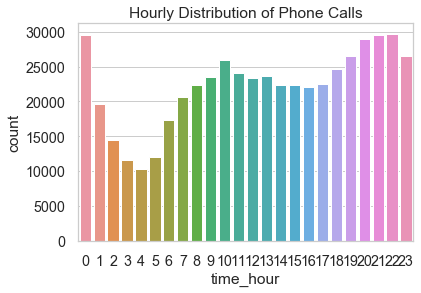

In [83]:
# Perform the analysis from df_sixstates
raw_df['timestamp'] =  pd.to_datetime(raw_df['timestamp'], infer_datetime_format=True)
#######
# Extract hour from dataframe and use groupby to count the events
def hr_func(ts):
    return ts.hour

raw_df['time_hour'] = raw_df['timestamp'].apply(hr_func)
raw_df.head()
######
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

grouped = raw_df.groupby(['time_hour'])['event_id'].count().reset_index(name='count')
g=sns.barplot(x='time_hour',y='count',data=grouped)
g.set_title("Hourly Distribution of Phone Calls")